In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import lane_detection

In [3]:
IMAGE_FILE = "lanes-15b8289a06a1b1e8a17347ad29bb1988.png"
# IMAGE_FILE = "rov_pool.jpg"

In [7]:
img = cv2.imread(IMAGE_FILE)
#img = cv2.imread("rov_pool.jpg")

[[[2863 1064 3818 1181]]

 [[2535 1079 3734 1312]]

 [[2532 1076 3807 1324]]

 [[1418 2133 1638 1248]]

 [[2783 1124 3809 1323]]

 [[3032 1091 3820 1187]]

 [[1422 2133 1624 1321]]

 [[2790 1060 3818 1186]]

 [[1052 2050 1443 1399]]

 [[1006 2132 1406 1465]]

 [[1010 2122 1405 1465]]

 [[2535 1080 3446 1257]]

 [[2868 1064 3813 1180]]

 [[1007 2131 1407 1465]]]


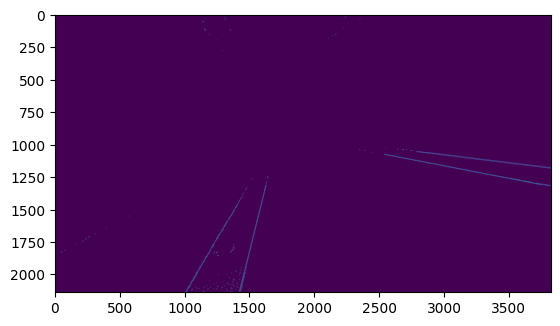

In [10]:
lines = lane_detection.detect_lines(img=img, threshold1=49, threshold2=50, apertureSize=3, minLineLength=500, maxLineGap=40)
print(lines)

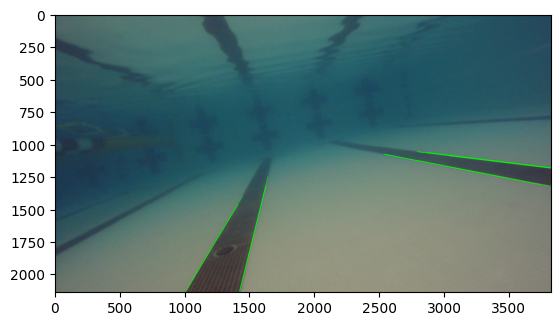

In [11]:
lane_detection.draw_lines(img, lines)

In [7]:
slopes, intercepts = lane_detection.get_slopes_intercept(lines)

In [8]:
lanes = lane_detection.detect_lanes(lines)

IndexError: list index out of range

In [ ]:
#new_image = lane_detection.literallyEverything(img, 50, 90, 3, 10)

In [ ]:
#plt.imshow(cv2.cvtColor(lane_detection.literallyEverything(cv2.imread(IMAGE_FILE)), cv2.COLOR_BGR2RGB))

In [ ]:
#lane_detection.draw_lines(img, lines)